In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [42]:
!pip install -q afinn

In [43]:
!pip install -q --upgrade afinn

In [44]:
from afinn import Afinn                                             # To generate sentiments from the text

In [45]:
data = pd.read_csv(filepath_or_buffer="https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%206%20ML3/Wholesale_customers_data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [46]:
data.shape

(440, 8)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [48]:
data['Channel'].nunique()

2

In [49]:
data['Channel'].unique()

array([2, 1])

In [50]:
data['Channel'].value_counts()

,count
Channel,
1,298
2,142


In [51]:
data['Region'].nunique()

3

In [52]:
data['Region'].unique()

array([3, 1, 2])

In [53]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [54]:
data.skew()

,0
Channel,0.760951
Region,-1.283627
Fresh,2.561323
Milk,4.053755
Grocery,3.587429
Frozen,5.907986
Detergents_Paper,3.631851
Delicassen,11.151586


## Exploratory Data Analysis

### 1. Distribution of total spend of customers.

In [55]:
data['total_spend'] = data['Fresh'] + data['Grocery'] + data['Milk'] + data['Frozen']+ data['Detergents_Paper']+data['Delicassen']

<Figure size 1000x500 with 0 Axes>

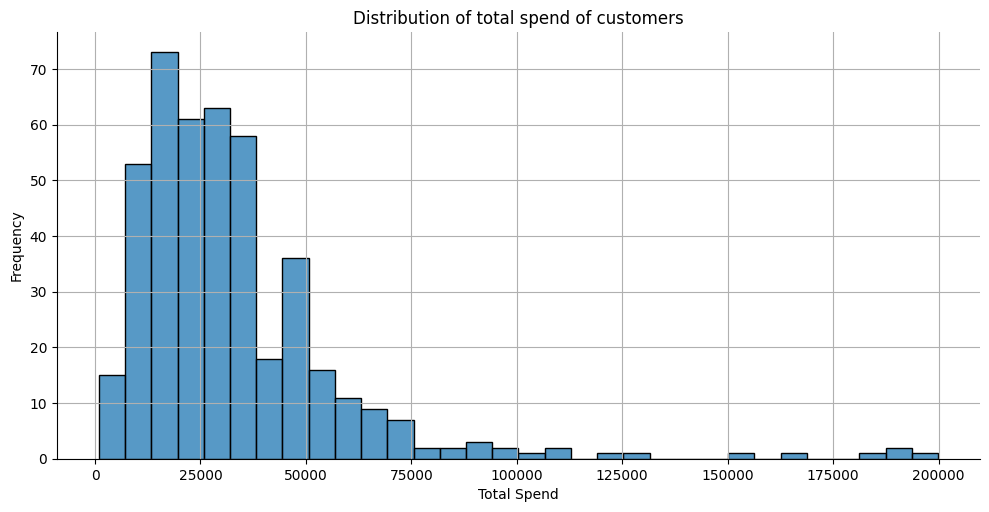

In [56]:
paper = plt.figure(figsize=(10,5))
sns.displot(data['total_spend'],aspect=2)
plt.title('Distribution of total spend of customers')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.grid(visible=True)
plt.show()

## Model Development and Evaluation

In [57]:
k=3
km = KMeans(n_clusters=k)
km.fit(data)

KMeans(n_clusters=3)

In [58]:
centroids = km.cluster_centers_
centroids

array([[1.52727273e+00, 2.58181818e+00, 2.08252273e+04, 8.69952727e+03,
        1.25718182e+04, 3.76827273e+03, 4.58968182e+03, 2.07271818e+03,
        5.25272455e+04],
       [1.66666667e+00, 2.60000000e+00, 3.39218000e+04, 3.01240667e+04,
        3.68118000e+04, 1.14974667e+04, 1.62224667e+04, 7.33580000e+03,
        1.35913400e+05],
       [1.23492063e+00, 2.52698413e+00, 7.87469524e+03, 3.62396190e+03,
        4.96344444e+03, 2.42754921e+03, 1.64969841e+03, 1.05684762e+03,
        2.15961968e+04]])

In [59]:
labels = km.labels_
labels

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [60]:
inertia = km.inertia_
inertia

165386697037.7526

In [61]:
data.columns[:-1]

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [62]:
data['cluster'] = labels
cluster_centers = pd.DataFrame(centroids,columns=data.columns[:-1])
print(cluster_centers)

    Channel    Region         Fresh          Milk       Grocery        Frozen  \
0  1.527273  2.581818  20825.227273   8699.527273  12571.818182   3768.272727   
1  1.666667  2.600000  33921.800000  30124.066667  36811.800000  11497.466667   
2  1.234921  2.526984   7874.695238   3623.961905   4963.444444   2427.549206   

   Detergents_Paper   Delicassen    total_spend  
0       4589.681818  2072.718182   52527.245455  
1      16222.466667  7335.800000  135913.400000  
2       1649.698413  1056.847619   21596.196825  


In [63]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spend,cluster
0,2,3,12669,9656,7561,214,2674,1338,34112,2
1,2,3,7057,9810,9568,1762,3293,1776,33266,2
2,2,3,6353,8808,7684,2405,3516,7844,36610,2
3,1,3,13265,1196,4221,6404,507,1788,27381,2
4,2,3,22615,5410,7198,3915,1777,5185,46100,0


In [64]:
data['cluster'].value_counts()

,count
cluster,
2,315
0,110
1,15


In [65]:
Inertia = []
K = range(2,16)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    Inertia.append(kmeans.inertia_)

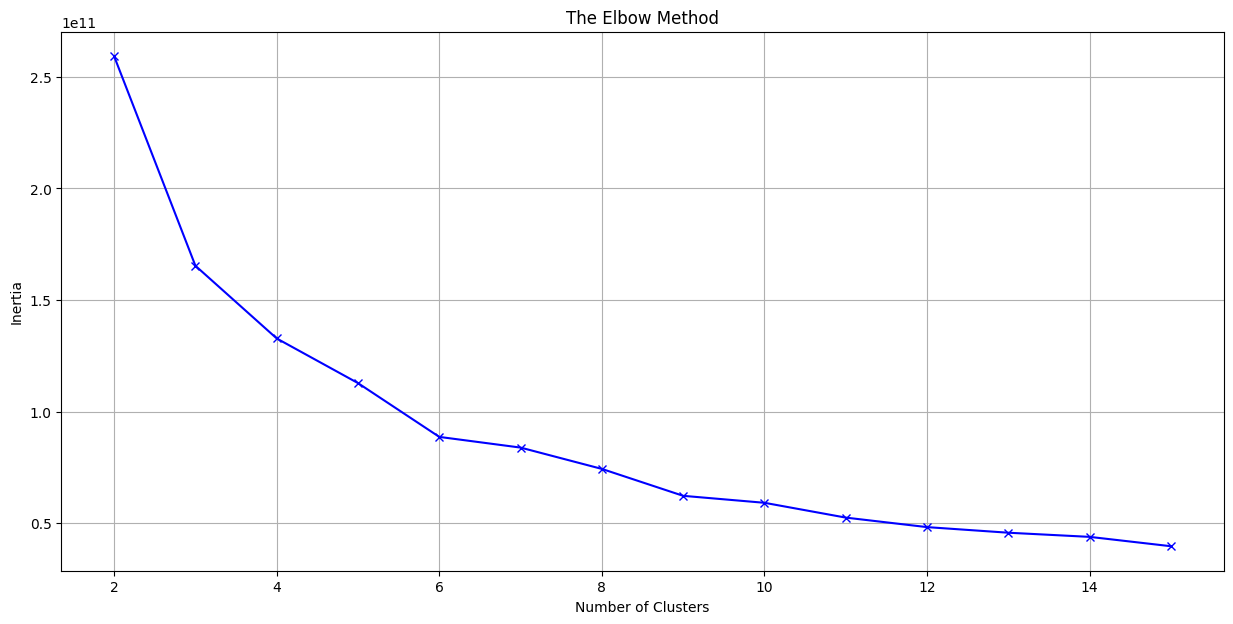

In [66]:
paper = plt.figure(figsize=[15,7])
plt.plot(K,Inertia,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.grid(visible=True)
plt.show()

In [67]:
data = data.drop('cluster',axis=1)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spend
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [68]:
optimal_clusters=7
km = KMeans(n_clusters=optimal_clusters,max_iter=3500)
km.fit(data)
centroids = km.cluster_centers_
labels = km.labels_

In [69]:
centroids

array([[1.83333333e+00, 2.54444444e+00, 4.43812222e+03, 9.35727778e+03,
        1.42269667e+04, 1.72965556e+03, 6.05133333e+03, 1.52448889e+03,
        3.73278444e+04],
       [1.20000000e+00, 2.80000000e+00, 5.20720000e+04, 1.29190000e+04,
        1.28524000e+04, 2.18562000e+04, 1.72360000e+03, 5.59080000e+03,
        1.07014000e+05],
       [1.07262570e+00, 2.50279330e+00, 5.61827933e+03, 2.45775419e+03,
        3.16629609e+03, 2.20664246e+03, 8.44027933e+02, 7.71346369e+02,
        1.50643464e+04],
       [1.23404255e+00, 2.65957447e+00, 3.28321915e+04, 5.35440426e+03,
        6.85317021e+03, 5.74172340e+03, 1.42665957e+03, 2.64019149e+03,
        5.48483404e+04],
       [1.66666667e+00, 3.00000000e+00, 4.47413333e+04, 4.76500000e+04,
        4.63968333e+04, 1.10546667e+04, 1.94926667e+04, 1.14703333e+04,
        1.80805833e+05],
       [1.20212766e+00, 2.54255319e+00, 1.75588085e+04, 3.25159574e+03,
        4.24589362e+03, 3.38774468e+03, 1.00400000e+03, 1.32858511e+03,
        3.0

In [70]:
labels

array([5, 0, 0, 5, 3, 5, 5, 0, 2, 0, 0, 2, 3, 3, 3, 2, 0, 2, 5, 2, 5, 2,
       3, 1, 3, 5, 2, 2, 6, 3, 5, 2, 5, 3, 2, 2, 3, 0, 0, 3, 3, 5, 0, 0,
       0, 6, 0, 4, 0, 6, 2, 2, 3, 0, 5, 2, 6, 0, 2, 2, 2, 4, 5, 0, 2, 6,
       2, 3, 2, 2, 5, 3, 2, 5, 0, 5, 2, 6, 2, 2, 2, 0, 0, 5, 5, 4, 4, 3,
       2, 5, 2, 5, 6, 3, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 5, 5, 0, 0, 2, 0,
       2, 0, 5, 5, 5, 2, 2, 2, 5, 2, 5, 2, 2, 0, 3, 1, 5, 3, 2, 3, 2, 2,
       5, 2, 2, 2, 0, 2, 5, 2, 5, 3, 3, 2, 5, 6, 2, 2, 2, 5, 5, 2, 5, 2,
       2, 0, 0, 5, 0, 0, 0, 2, 5, 6, 0, 6, 0, 2, 2, 2, 0, 6, 2, 0, 2, 0,
       3, 5, 5, 2, 5, 4, 0, 4, 2, 2, 2, 0, 0, 0, 5, 2, 2, 0, 2, 5, 3, 0,
       5, 2, 0, 6, 3, 2, 2, 0, 2, 2, 2, 0, 5, 6, 2, 2, 0, 0, 6, 5, 0, 2,
       2, 0, 2, 2, 2, 5, 5, 2, 2, 2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 3, 3, 5,
       5, 5, 0, 0, 2, 2, 5, 2, 2, 6, 2, 3, 0, 5, 2, 2, 3, 3, 2, 2, 5, 2,
       0, 0, 0, 5, 0, 2, 2, 2, 2, 3, 2, 2, 3, 5, 5, 5, 2, 5, 3, 3, 1, 3,
       2, 5, 2, 3, 2, 2, 2, 0, 5, 2, 5, 2, 0, 2, 5,

In [71]:
data['cluster'] = labels
cluster_centers = pd.DataFrame(centroids,columns=data.columns[:-1])
print(cluster_centers)

    Channel    Region         Fresh          Milk       Grocery        Frozen  \
0  1.833333  2.544444   4438.122222   9357.277778  14226.966667   1729.655556   
1  1.200000  2.800000  52072.000000  12919.000000  12852.400000  21856.200000   
2  1.072626  2.502793   5618.279330   2457.754190   3166.296089   2206.642458   
3  1.234043  2.659574  32832.191489   5354.404255   6853.170213   5741.723404   
4  1.666667  3.000000  44741.333333  47650.000000  46396.833333  11054.666667   
5  1.202128  2.542553  17558.808511   3251.595745   4245.893617   3387.744681   
6  2.000000  2.421053   8030.473684  18971.684211  30921.684211   1951.263158   

   Detergents_Paper    Delicassen    total_spend  
0       6051.333333   1524.488889   37327.844444  
1       1723.600000   5590.800000  107014.000000  
2        844.027933    771.346369   15064.346369  
3       1426.659574   2640.191489   54848.340426  
4      19492.666667  11470.333333  180805.833333  
5       1004.000000   1328.585106   30776.627

In [72]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spend,cluster
0,2,3,12669,9656,7561,214,2674,1338,34112,5
1,2,3,7057,9810,9568,1762,3293,1776,33266,0
2,2,3,6353,8808,7684,2405,3516,7844,36610,0
3,1,3,13265,1196,4221,6404,507,1788,27381,5
4,2,3,22615,5410,7198,3915,1777,5185,46100,3


In [73]:
data['cluster'].value_counts()

,count
cluster,
2,179
5,94
0,90
3,47
6,19
4,6
1,5


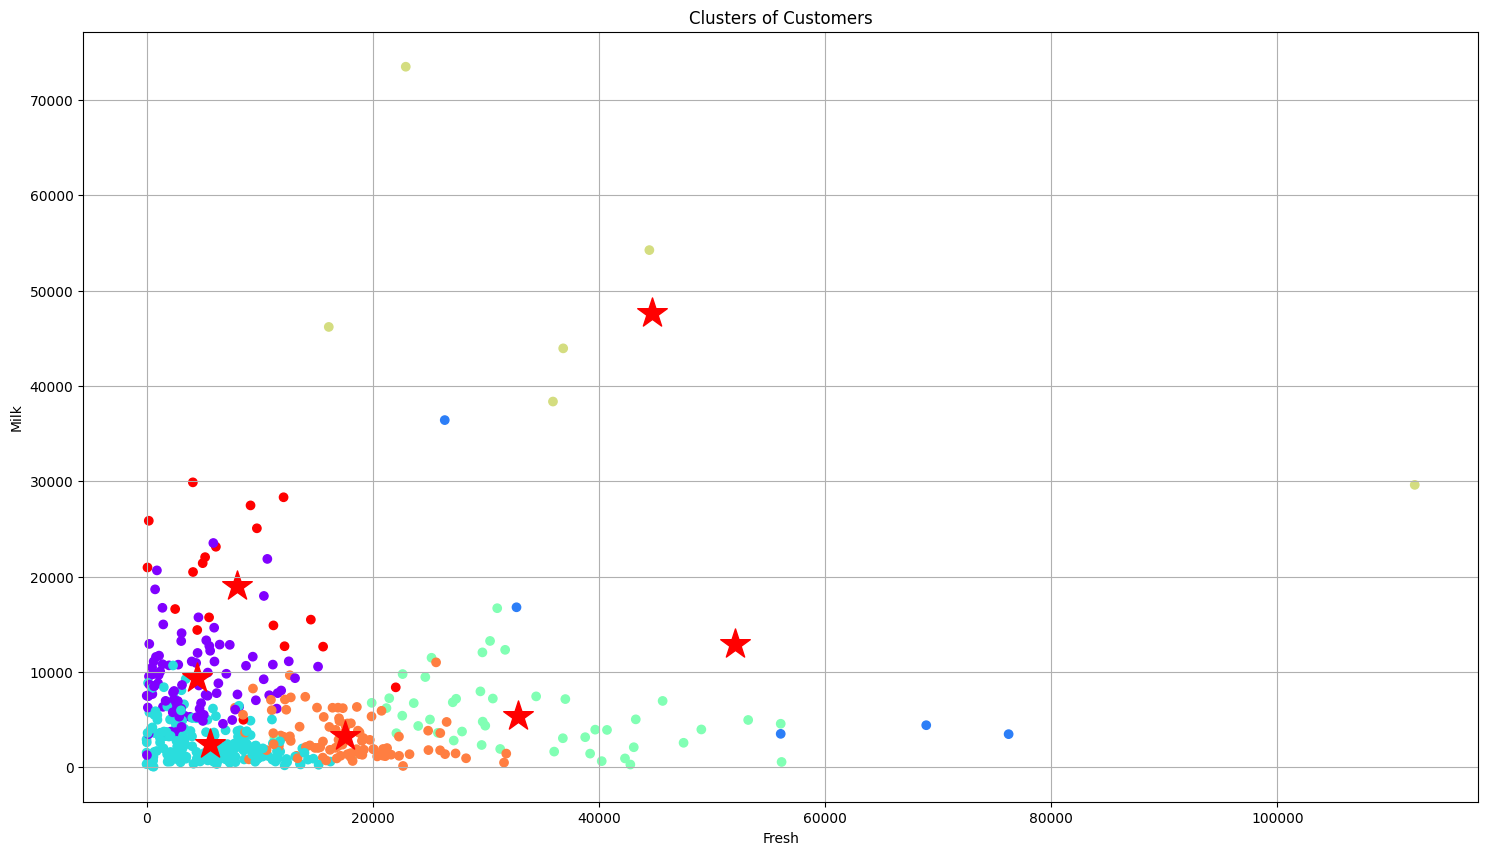

In [85]:
paper = plt.figure(figsize=[18,10])
plt.scatter(data['Fresh'],data['Milk'],c=data['cluster'],cmap='rainbow',marker='o')
plt.scatter(cluster_centers['Fresh'],cluster_centers['Milk'],c='red',marker='*',s=500)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Clusters of Customers')
plt.grid(visible=True)
plt.show()

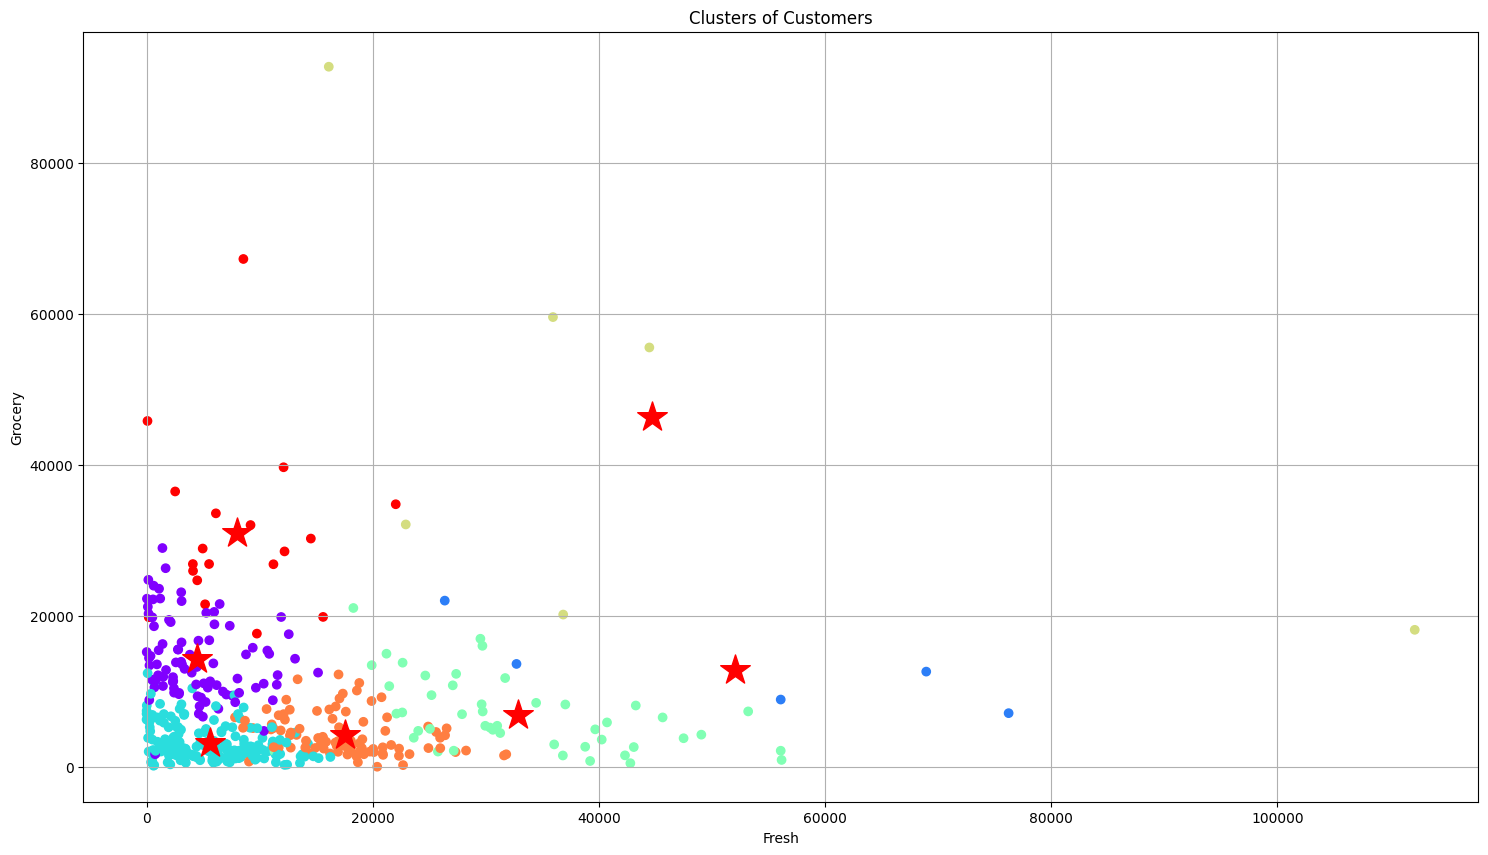

In [88]:
paper = plt.figure(figsize=[18,10])
plt.scatter(data['Fresh'],data['Grocery'],c=data['cluster'],cmap='rainbow',marker='o')
plt.scatter(cluster_centers['Fresh'],cluster_centers['Grocery'],c='red',marker='*',s=500)
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Clusters of Customers')
plt.grid(visible=True)
plt.show()

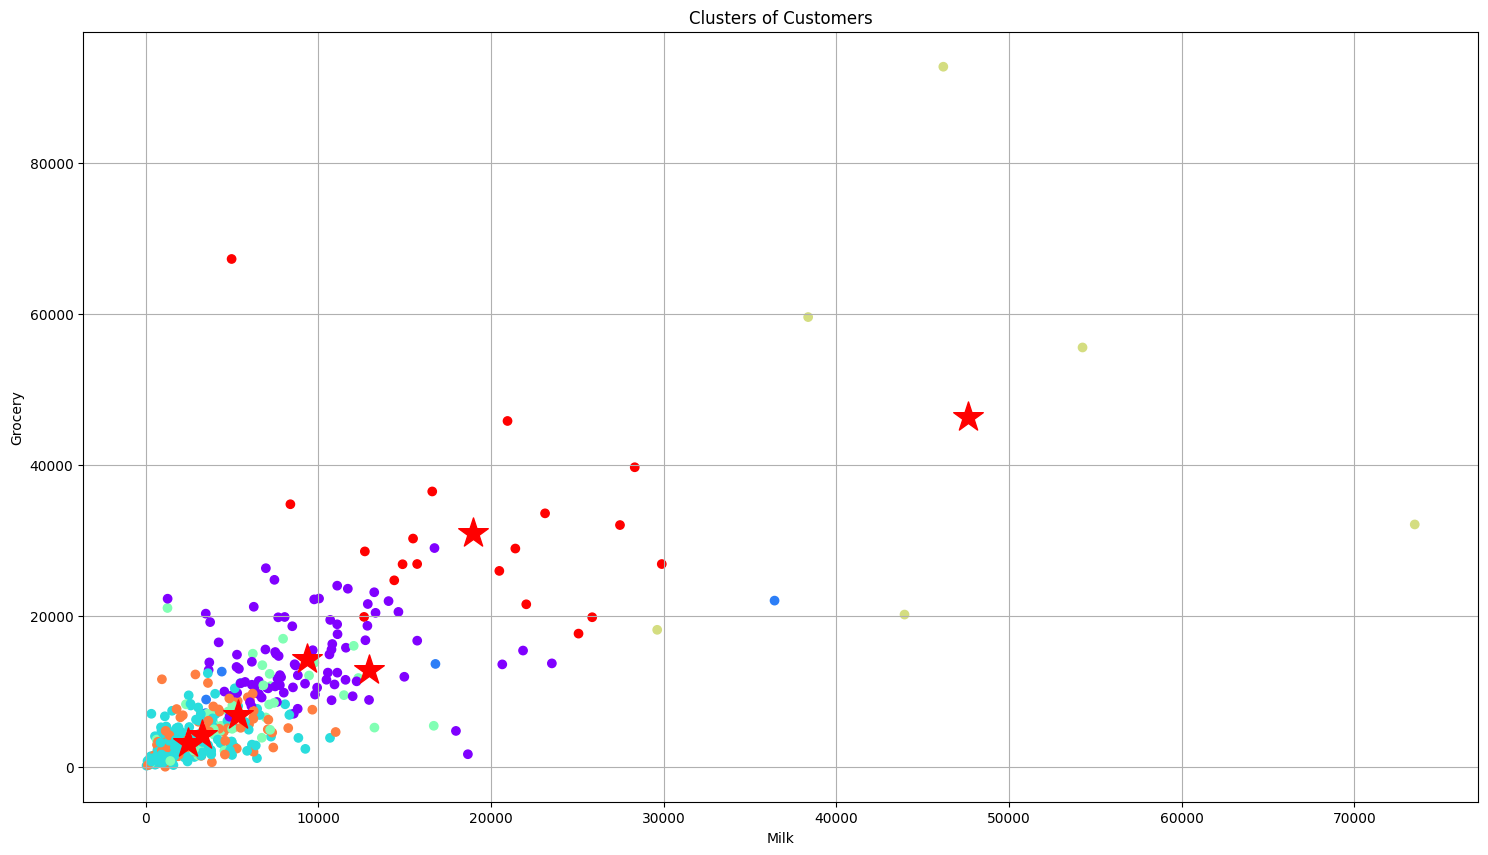

In [89]:
paper = plt.figure(figsize=[18,10])
plt.scatter(data['Milk'],data['Grocery'],c=data['cluster'],cmap='rainbow',marker='o')
plt.scatter(cluster_centers['Milk'],cluster_centers['Grocery'],c='red',marker='*',s=500)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Clusters of Customers')
plt.grid(visible=True)
plt.show()

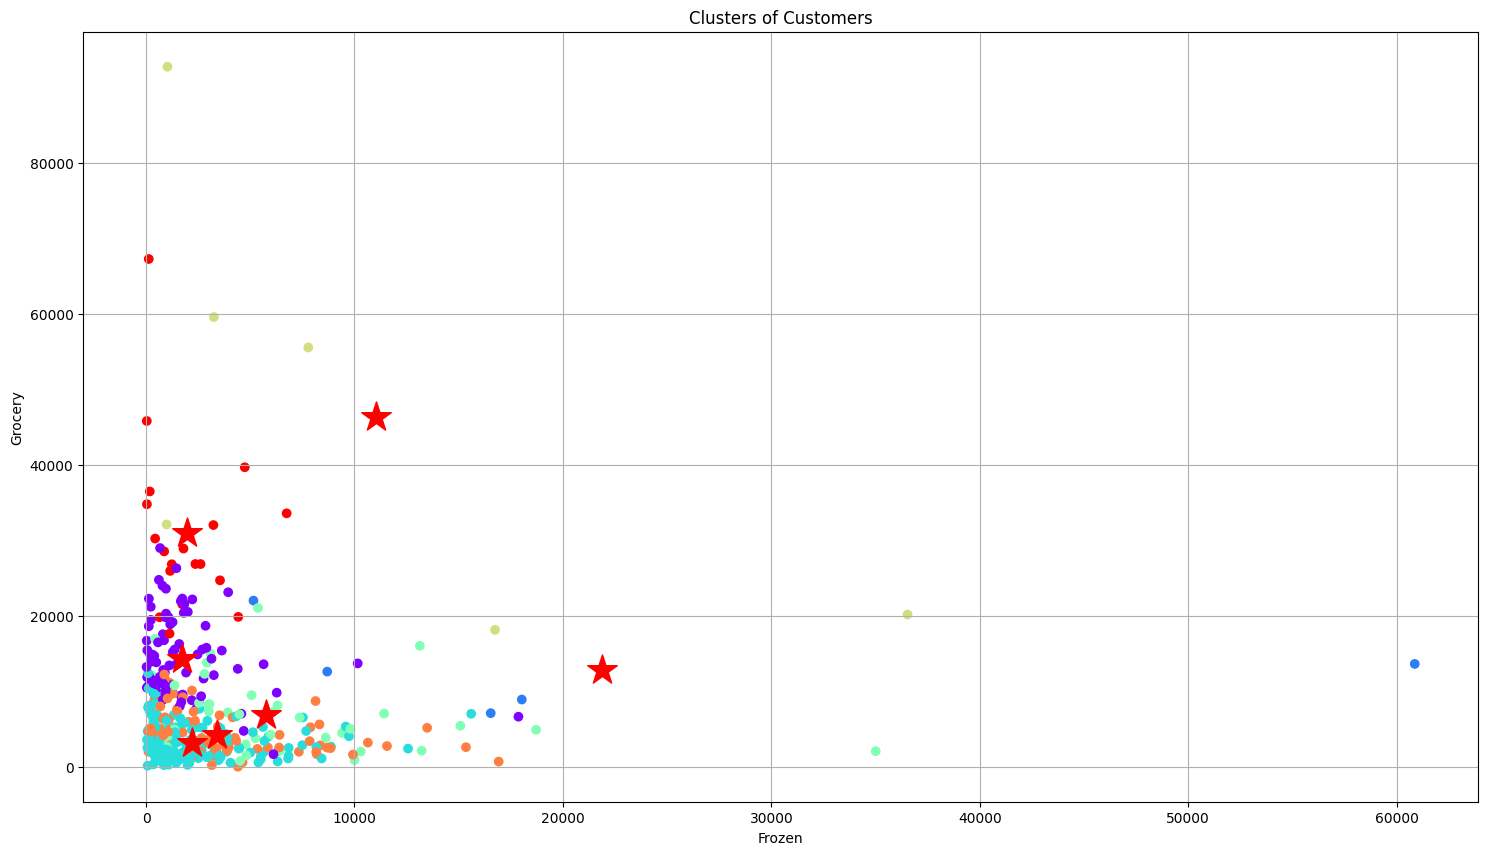

In [90]:
paper = plt.figure(figsize=[18,10])
plt.scatter(data['Frozen'],data['Grocery'],c=data['cluster'],cmap='rainbow',marker='o')
plt.scatter(cluster_centers['Frozen'],cluster_centers['Grocery'],c='red',marker='*',s=500)
plt.xlabel('Frozen')
plt.ylabel('Grocery')
plt.title('Clusters of Customers')
plt.grid(visible=True)
plt.show()